In [20]:
import datetime  # For datetime objects
import os.path  # To manage paths
from datetime import date, datetime, timedelta

# Import the backtrader platform
import backtrader as bt

In [21]:
class SmaCross(bt.SignalStrategy):
  def __init__(self):
    sma1, sma2 = bt.ind.SMA(period=50), bt.ind.SMA(period=200)
    crossover = bt.ind.CrossOver(sma1, sma2)
    self.signal_add(bt.SIGNAL_LONG, crossover)

In [22]:
cerebro = bt.Cerebro()
# Set our desired cash start
cerebro.broker.setcash(100000.0)
cerebro.addstrategy(SmaCross)

0

In [23]:
# Create a Data Feed
PATH = "../data/investpy/data/index/"
data = bt.feeds.GenericCSVData(
    dataname=PATH+'S&P_500.csv',

    fromdate=datetime(2000, 1, 1),
    todate=datetime(2020, 12, 31),

    nullvalue=0.0,

    dtformat=('%Y-%m-%d'),

    datetime=0,
    high=1,
    low=2,
    open=3,
    close=4,
    volume=5,
    openinterest=-1
)

Starting Portfolio Value: 100000.00
Final Portfolio Value: 101469.20


<IPython.core.display.Javascript object>


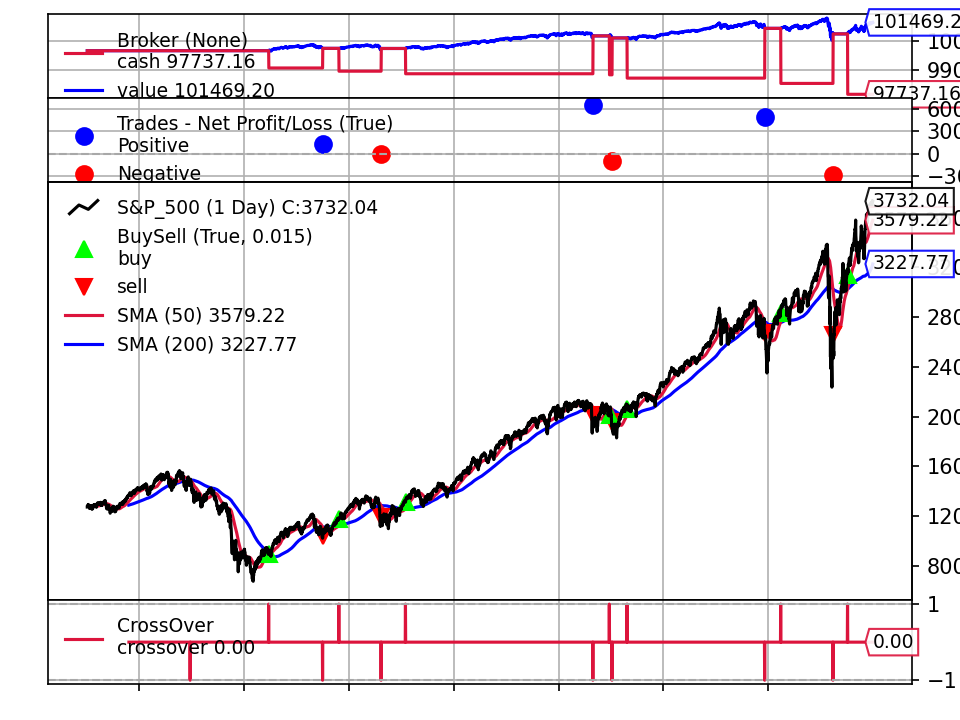

[[<Figure size 640x480 with 5 Axes>]]

In [24]:
cerebro.adddata(data)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()